# Deteching Parkinsons Disease

> ### Makenzie Hesse

In [224]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.linalg as LA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import axes3d
from scipy import stats

In [225]:
df = pd.read_csv('archive/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Determining Number of Sick and Healthy People in Dataset

In [226]:
features = df.loc[:, df.columns!='status'].values[:,1:]
labels = df.loc[:,'status'].values

print (labels[labels==1].shape[0],labels[labels==0].shape[0])
#number of sick and healthy

147 48


### Training Variables/ Machine Learning Prep

In [273]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels

In [258]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=7)

### XGB Classifier

In [267]:
model =XGBClassifier()
model.fit(x_train,y_train)

[11:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\mkhca\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [268]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

94.87179487179486


### Random Forest

In [263]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=17, random_state=2)
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_test)

In [271]:
(accuracy_score(y_test, y_pred1)*100)

89.74358974358975

### Transforming for Visualization

In [265]:
x= df.iloc[:,1:].drop(labels="status", axis=1)
y=df["status"]
scaler = StandardScaler()
z_fit = scaler.fit_transform(x)
z=pd.DataFrame(data =z_fit, columns=x.columns)
z_join = pd.concat([y, z.iloc[:,:]], axis =1)
data = pd.melt(z_join,id_vars="status",var_name="features",value_name='value')
data

,status,features,value
0,1,MDVP:Fo(Hz),-0.829300
1,1,MDVP:Fo(Hz),-0.770972
2,1,MDVP:Fo(Hz),-0.909476
3,1,MDVP:Fo(Hz),-0.909622
4,1,MDVP:Fo(Hz),-0.925657
...,...,...,...
4285,0,PPE,-0.817703
4286,0,PPE,-0.418929
4287,0,PPE,-0.832410
4288,0,PPE,-0.926105


### Visualization :)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'MDVP:Fo(Hz)'),
  Text(1, 0, 'MDVP:Fhi(Hz)'),
  Text(2, 0, 'MDVP:Flo(Hz)'),
  Text(3, 0, 'MDVP:Jitter(%)'),
  Text(4, 0, 'MDVP:Jitter(Abs)'),
  Text(5, 0, 'MDVP:RAP'),
  Text(6, 0, 'MDVP:PPQ'),
  Text(7, 0, 'Jitter:DDP'),
  Text(8, 0, 'MDVP:Shimmer'),
  Text(9, 0, 'MDVP:Shimmer(dB)'),
  Text(10, 0, 'Shimmer:APQ3'),
  Text(11, 0, 'Shimmer:APQ5'),
  Text(12, 0, 'MDVP:APQ'),
  Text(13, 0, 'Shimmer:DDA'),
  Text(14, 0, 'NHR'),
  Text(15, 0, 'HNR'),
  Text(16, 0, 'RPDE'),
  Text(17, 0, 'DFA'),
  Text(18, 0, 'spread1'),
  Text(19, 0, 'spread2'),
  Text(20, 0, 'D2'),
  Text(21, 0, 'PPE')])

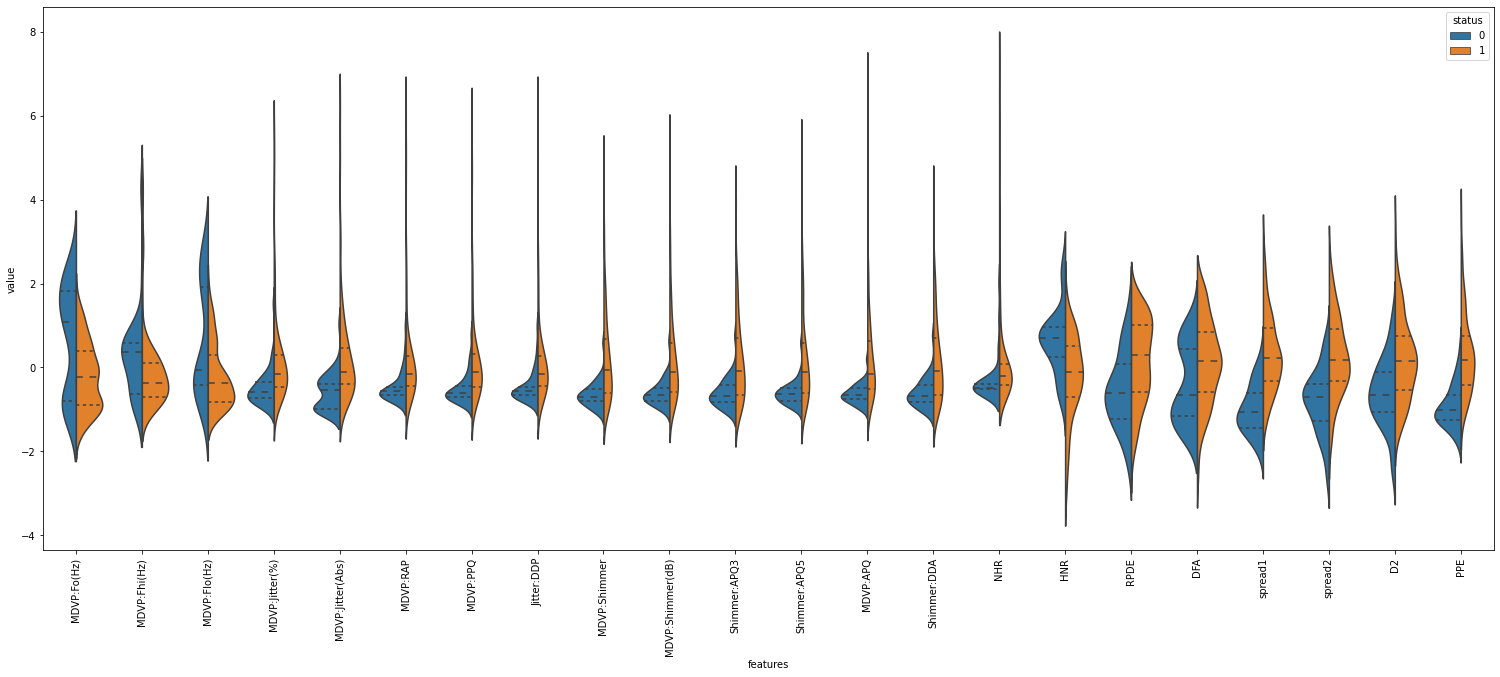

In [266]:
plt.figure(figsize=(26,10))
sns.violinplot(x="features", y="value", hue="status", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'MDVP:Fo(Hz)'),
  Text(1, 0, 'MDVP:Fhi(Hz)'),
  Text(2, 0, 'MDVP:Flo(Hz)'),
  Text(3, 0, 'MDVP:Jitter(%)'),
  Text(4, 0, 'MDVP:Jitter(Abs)'),
  Text(5, 0, 'MDVP:RAP'),
  Text(6, 0, 'MDVP:PPQ'),
  Text(7, 0, 'Jitter:DDP'),
  Text(8, 0, 'MDVP:Shimmer'),
  Text(9, 0, 'MDVP:Shimmer(dB)'),
  Text(10, 0, 'Shimmer:APQ3'),
  Text(11, 0, 'Shimmer:APQ5'),
  Text(12, 0, 'MDVP:APQ'),
  Text(13, 0, 'Shimmer:DDA'),
  Text(14, 0, 'NHR'),
  Text(15, 0, 'HNR'),
  Text(16, 0, 'RPDE'),
  Text(17, 0, 'DFA'),
  Text(18, 0, 'spread1'),
  Text(19, 0, 'spread2'),
  Text(20, 0, 'D2'),
  Text(21, 0, 'PPE')])

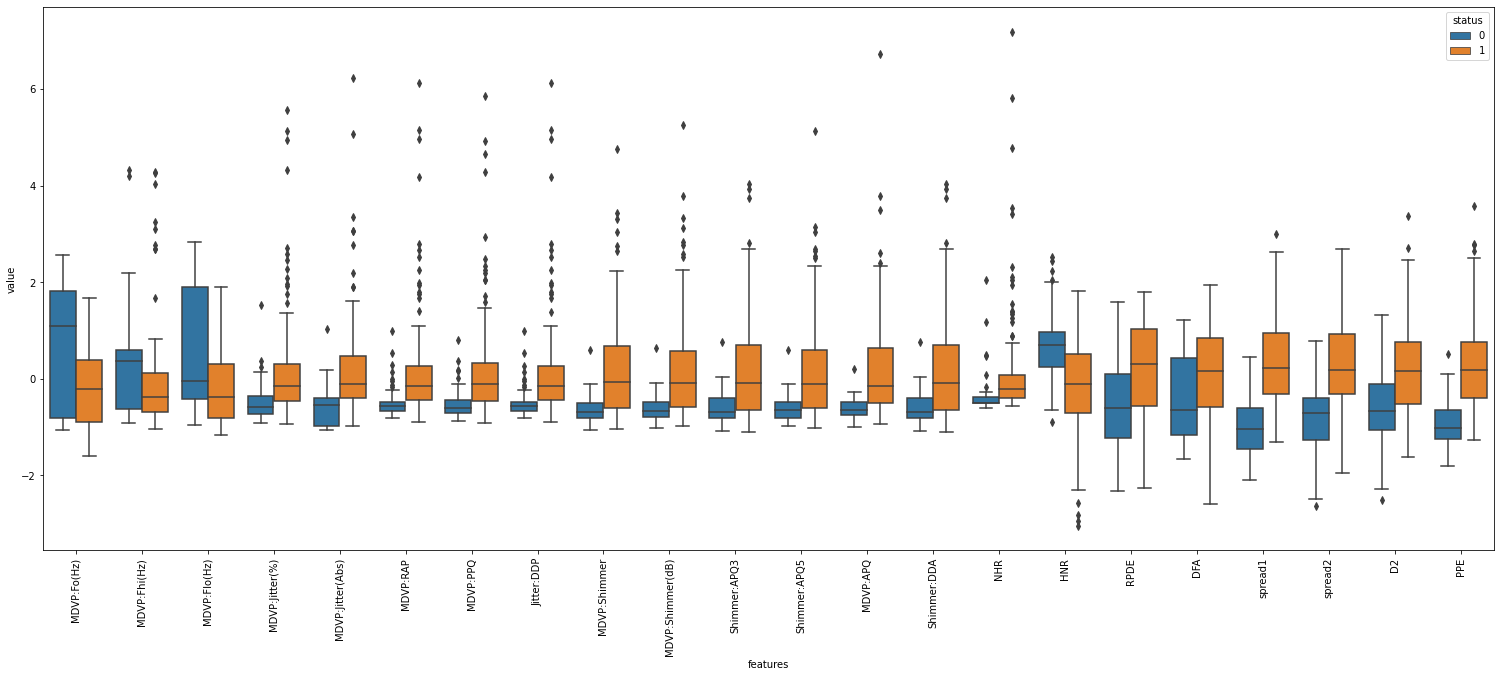

In [254]:
plt.figure(figsize=(26,10))
sns.boxplot(x="features", y="value", hue="status", data=data)
plt.xticks(rotation=90)

### Determining Significant Features

<AxesSubplot:>

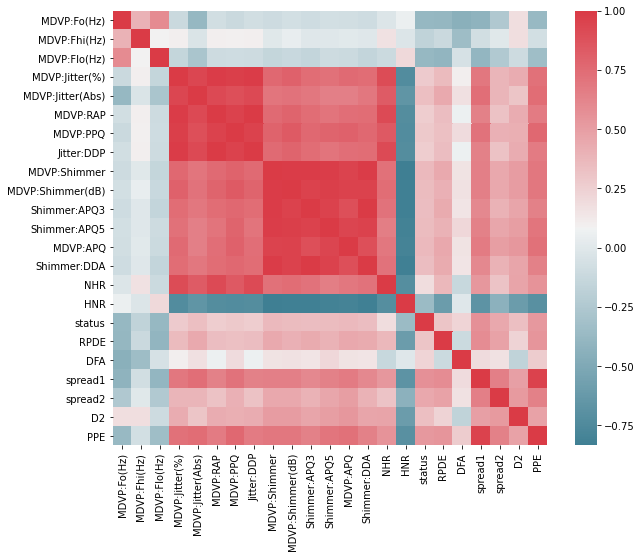

In [256]:
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype= bool), cmap=sns.diverging_palette(220,10, as_cmap=True), square=True, ax=ax)

C:\Users\mkhca\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.06173736 0.04940115 0.02179163 0.01063352 0.0071209  0.01060774
 0.00547219 0.         0.         0.07664676 0.06654432 0.08467383
 0.02408274 0.         0.036289   0.01701356 0.06393628 0.01855674
 0.12162358 0.02541841 0.01440853 0.2840418 ]


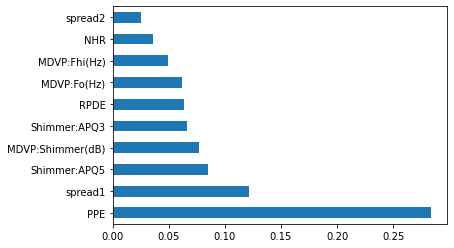

In [255]:
from sklearn.ensemble import ExtraTreesClassifier
model = XGBClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Training with Significant Features

In [275]:
rfc = x_train[['PPE', 'spread1', 'Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'RPDE', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'NHR', 'spread2']].copy()
x_train1, x_test1, y_train1, y_test1 = train_test_split(rfc,y_train,test_size=.2)

### Random Forest with Select Features

In [276]:
clf1 = RandomForestClassifier(n_estimators= 200, max_depth = 30 )
clf1.fit(x_train1, y_train1)
y_pred2 = clf1.predict(x_test1)

In [284]:
(accuracy_score(y_test1, y_pred2))*100
#random forest with select features

90.625